In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data-raw/crypto-markets.csv')

df = df.drop(columns=['slug'])
df['date'] = pd.to_datetime(df['date'])
min_date = df['date'].min()
max_date = df['date'].max()
df = df.sort_values(['symbol', 'date'])

coin_ranges = df.groupby('symbol')['date'].agg(['min', 'max']).reset_index()
coin_ranges.head



In [ ]:
# Extract time-series summary features per df numeric feature per coin
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def extract_coin_features(group):
    features = {}
    for col in numeric_cols:
        series = group[col]
        features[f'{col}_mean'] = series.mean()
        features[f'{col}_std'] = series.std()
        features[f'{col}_min'] = series.min()
        features[f'{col}_max'] = series.max()
        features[f'{col}_trend'] = np.polyfit(range(len(series)), series, deg=1)[0] if len(series) > 1 else 0
    return pd.Series(features)

feature_df = df.groupby('symbol').apply(extract_coin_features).dropna()
feature_df

/var/folders/0n/kwcts2ks32n5v8884446s1j40000gn/T/ipykernel_77841/824071327.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_df = df.groupby('symbol').apply(extract_coin_features).dropna()


,ranknow_mean,ranknow_std,ranknow_min,ranknow_max,ranknow_trend,open_mean,open_std,open_min,open_max,open_trend,...,close_ratio_mean,close_ratio_std,close_ratio_min,close_ratio_max,close_ratio_trend,spread_mean,spread_std,spread_min,spread_max,spread_trend
symbol,,,,,,,,,,,,,,,,,,,,,
$$$,1634.0,0.0,1634.0,1634.0,1.017259e-15,0.000976,0.001649,5.000000e-06,0.017379,2.548267e-06,...,0.361878,0.364105,0.0000,1.0,0.000191,0.000036,0.000601,0.00,0.01,8.227026e-08
$PAC,419.0,0.0,419.0,419.0,-8.666773e-16,0.001041,0.002181,2.500000e-09,0.016133,3.908197e-06,...,0.433197,0.326306,-0.5000,1.0,0.000039,0.000000,0.000000,0.00,0.00,0.000000e+00
0XBTC,706.0,0.0,706.0,706.0,-2.062632e-15,0.758279,0.583010,2.617410e-01,4.230000,-7.844581e-03,...,0.455226,0.275456,0.0000,1.0,0.000587,0.181117,0.251914,0.03,2.14,-2.483774e-03
1337,1251.0,0.0,1251.0,1251.0,1.155274e-15,0.000075,0.000114,6.500000e-07,0.001085,1.387695e-07,...,0.439675,0.357820,0.0000,1.0,0.000030,0.000000,0.000000,0.00,0.00,0.000000e+00
1ST,498.0,0.0,498.0,498.0,4.375284e-16,0.360271,0.396487,3.207100e-02,2.730000,-1.264999e-04,...,0.486337,0.302157,0.0000,1.0,-0.000137,0.067011,0.126574,0.00,1.84,-3.032604e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZT,2065.0,0.0,2065.0,2065.0,-6.612451e-14,0.100920,0.014361,7.351200e-02,0.127372,-1.117907e-03,...,0.463774,0.270296,0.0956,1.0,-0.000818,0.010263,0.004925,0.00,0.02,-1.422475e-05
ZUR,1596.0,0.0,1596.0,1596.0,1.185062e-16,0.001341,0.002008,1.200000e-05,0.020219,2.682945e-06,...,0.419587,0.364857,0.0000,1.0,0.000180,0.000188,0.001741,0.00,0.03,2.921763e-08
ZXC,1034.0,0.0,1034.0,1034.0,-4.955544e-15,0.011653,0.010145,1.905000e-03,0.039791,-2.092171e-04,...,0.421050,0.269192,0.0000,1.0,-0.001422,0.000638,0.002453,0.00,0.01,-2.084850e-05


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

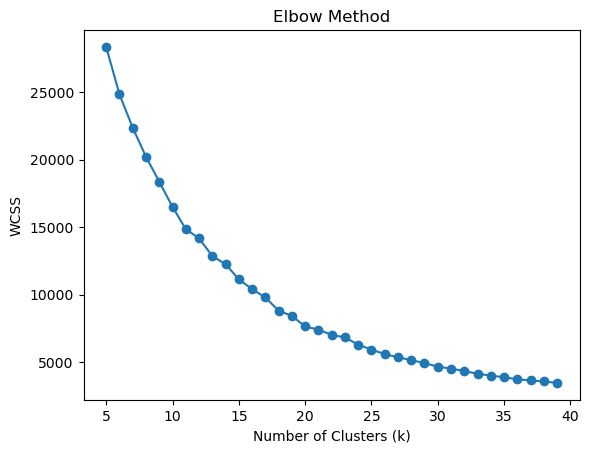

In [44]:
scaler = StandardScaler()
scaled_feature_df = scaler.fit_transform(feature_df)

wcss = []
for k in range(5, 40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_feature_df)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS (within-cluster sum of squares)

plt.plot(range(5, 40), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

for k in range(5, 40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_feature_df)
    score = silhouette_score(scaled_feature_df, labels)
    print(f"k={k}, silhouette score={score:.3f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_feature_df)


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, silhouette score=0.344
k=6, silhouette score=0.349


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7, silhouette score=0.359
k=8, silhouette score=0.360


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9, silhouette score=0.360
k=10, silhouette score=0.374


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=11, silhouette score=0.378
k=12, silhouette score=0.378


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=13, silhouette score=0.242
k=14, silhouette score=0.295


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=15, silhouette score=0.304
k=16, silhouette score=0.301


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=17, silhouette score=0.298


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=18, silhouette score=0.248


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=19, silhouette score=0.235


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=20, silhouette score=0.250


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=21, silhouette score=0.243


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=22, silhouette score=0.234


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=23, silhouette score=0.227


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=24, silhouette score=0.253


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=25, silhouette score=0.246


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=26, silhouette score=0.239


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=27, silhouette score=0.237


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=28, silhouette score=0.237


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=29, silhouette score=0.233


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=30, silhouette score=0.243


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=31, silhouette score=0.241


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=32, silhouette score=0.240


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=33, silhouette score=0.239


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=34, silhouette score=0.206


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=35, silhouette score=0.211


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=36, silhouette score=0.213


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=37, silhouette score=0.211


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=38, silhouette score=0.205


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=39, silhouette score=0.208


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


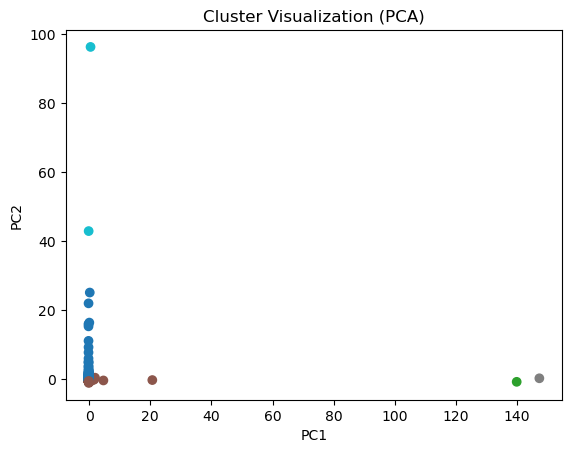

In [46]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(scaled_feature_df)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10')
plt.title("Cluster Visualization (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [47]:
clustered_df = pd.DataFrame({
    'symbol': feature_df.index, 
    'cluster': clusters
})

for cluster_id in sorted(clustered_df['cluster'].unique()):
    group = clustered_df[clustered_df['cluster'] == cluster_id]
    symbols = group['symbol'].tolist()
    print(f"\n🟢 Cluster {cluster_id} ({len(symbols)} coins):")
    print(", ".join(symbols))


🟢 Cluster 0 (1008 coins):
$PAC, 0XBTC, 1ST, 1WO, 2GIVE, AAC, ABL, ABT, ABX, ABY, ABYSS, AC3, ACAT, ACE, ACM, ACT, ADA, ADB, ADC, ADH, ADI, ADST, ADT, ADX, AE, AEON, AGI, AID, AIDOC, AION, AIT, AIX, AKA, ALI, ALIS, ALX, AMB, AMLT, AMM, AMN, AMO, AMP, ANT, AOA, AOG, APH, APIS, APL, APPC, APR, ARC, ARCT, ARDR, ARG, ARK, ARN, ARO, ART, ARY, AST, ATB, ATCC, ATL, ATMI, ATN, AU, AUC, AUR, AURA, AUTO, AUX, AVA, AVT, AXPR, B2B, BANCA, BAT, BAX, BAY, BBC, BBK, BBN, BBO, BBP, BBR, BCA, BCAC, BCD, BCH, BCI, BCN, BCO, BCPT, BCY, BCZERO, BDG, BDT, BEE, BEET, BELA, BERRY, BETHER, BETR, BEZ, BFT, BHPC, BIR, BIS, BITB, BITCNY, BITG, BITUSD, BITX, BIX, BKX, BLK, BLOC, BLOCK, BLT, BLUE, BMC, BMX, BNB, BND, BNT, BNTY, BOB, BOE, BON, BOS, BOT, BOUTS, BOX, BOXX, BPT, BRD, BRK, BRM, BRZC, BSD, BSV, BTCP, BTCZ, BTG, BTK, BTM, BTN, BTO, BTS, BTT, BTX, BTXC, BUNNY, BURST, BWK, BWT, BWX, BZ, BZNT, C20, CAG, CANN, CAPP, CARD, CAS, CBC, CBT, CCCX, CCL, CCRB, CDM, CDT, CEEK, CENNZ, CFL, CFUN, CHAT, CHP, CHSB, CHX,